# Global Income Distribution

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
from matplotlib import ticker as ticker

In [4]:
import seaborn as sns

In [5]:
sns.set()

### STYLE IT UP!

You can manually set chart style, but it's not worth it

In [6]:
# sns.set(style="white")
# sns.set(rc={'font.family': ['sans-serif']})
# sns.set_context("paper", rc={"font.size":10,"axes.titlesize":30,"axes.labelsize":20}) 
# sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")

### Amazing styling
Credit goes to https://www.dataquest.io/blog/making-538-plots/ and _FiveThirtyEight_ and creator of the _matplotlib_ style

In [7]:
import matplotlib.style as style

In [8]:
style.use('fivethirtyeight')

## Load Data

In [83]:
df = pd.read_csv('figure5data.csv')

In [84]:
df.head(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
0,10.0,20,0.193099,0.092346,0.193099,0.092346
1,30.0,40,0.279632,0.092270,0.472732,0.184616
2,50.0,60,0.354766,0.106717,0.827497,0.291334


In [85]:
df.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1396,850000.0,900000,5.432730e-07,1.313583e-06,99.999999,99.999998
1397,950000.0,1000000,3.014858e-07,6.997651e-07,99.999999,99.999999
1398,NaN,Above,5.097248e-07,1.042394e-06,100.000000,100.000000


Drop the last row as it includes NaN!

In [86]:
df.drop(df.tail(1).index,inplace=True)

In [87]:
df.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1395,750000.0,800000,1.046824e-06,2.630042e-06,99.999999,99.999997
1396,850000.0,900000,5.432730e-07,1.313583e-06,99.999999,99.999998
1397,950000.0,1000000,3.014858e-07,6.997651e-07,99.999999,99.999999


## Graph earners under US poverty line

After 14,000 entries, the scale changes

2013 individual income poverty threshold: `$11,490`

In [88]:
subset = df.loc[df['midpoint'] < 11490]

In [102]:
my_line_color = [86/255,180/255,233/255]

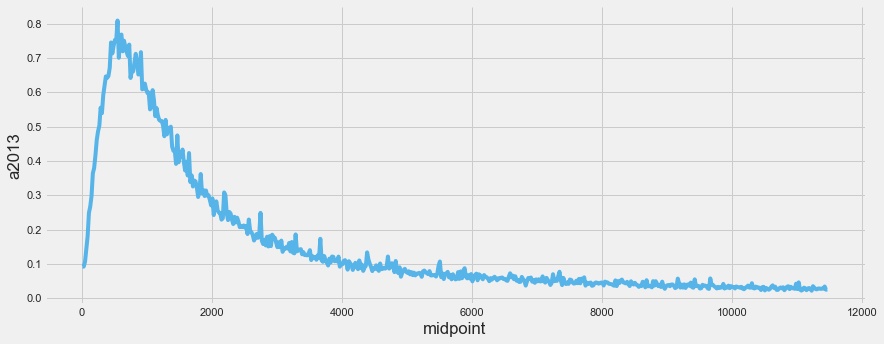

In [105]:
chart = sns.relplot(
  x="midpoint", 
  y="a2013", 
  kind="line",
  color=my_line_color,
  data=subset, 
  height=5,
  aspect=10/4
)

The graph is too jaggedy, so we'll smooth it by grouping individuals into large buckets!

In [16]:
bigger_buckets = pd.DataFrame(columns=['x', 'y'])

In [17]:
N = 5
tempX = subset.groupby(subset.index // N).median()
tempY = subset.groupby(subset.index // N).sum()

In [18]:
bigger_buckets['x'] = tempX['midpoint']

In [19]:
bigger_buckets['y'] = tempY['a2013']

In [20]:
bigger_buckets.head(5)

,x,y
0,50.0,0.615695
1,150.0,1.558012
2,250.0,2.420931
3,350.0,3.038067
4,450.0,3.512602


(-40, 11490)

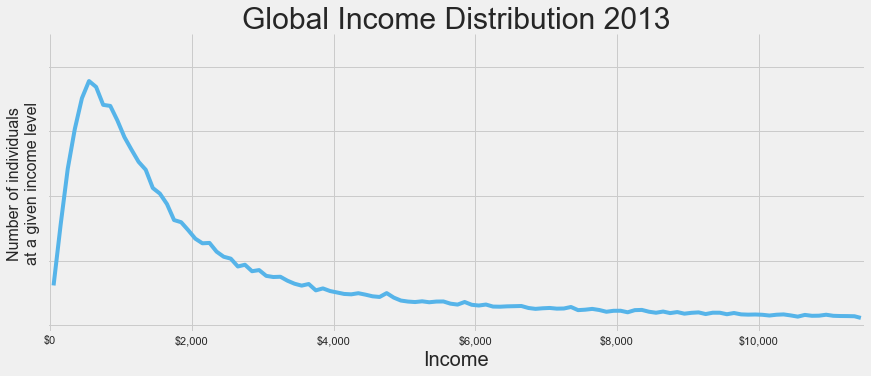

In [106]:
chart = sns.relplot(
  x="x", 
  y="y", 
  kind="line", 
  data=bigger_buckets, 
  color=my_line_color,
  height=5,
  aspect=10/4
)

chart.axes[0][0].set_title("Global Income Distribution 2013", fontsize=30)
chart.axes[0][0].set_xlabel("Income",fontsize=20)
chart.axes[0][0].set_ylabel("Number of individuals\nat a given income level",fontsize=16)

xticks = chart.axes[0][0].get_xticks()
xlabels = ['$' + '{:,.0f}'.format(x) for x in xticks]
chart.set_xticklabels(xlabels)

chart.set_yticklabels([])

chart.axes[0][0].set_ylim(-0.1, N * 0.9)
chart.axes[0][0].set_xlim(-40, 11490)

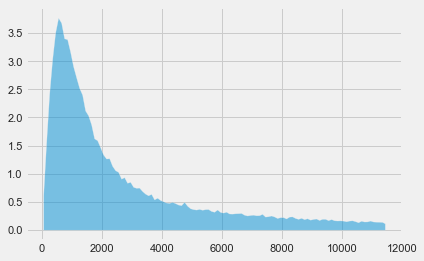

In [36]:
plt.stackplot(bigger_buckets["x"], bigger_buckets["y"], alpha=0.5) 

## Percentile graph

In [37]:
df.head(5)

,midpoint,gdpc,a2003,a2013,c2003,c2013
0,10.0,20,0.193099,0.092346,0.193099,0.092346
1,30.0,40,0.279632,0.092270,0.472732,0.184616
2,50.0,60,0.354766,0.106717,0.827497,0.291334
3,70.0,80,0.505162,0.143204,1.332659,0.434538
4,90.0,100,0.647129,0.181157,1.979788,0.615695


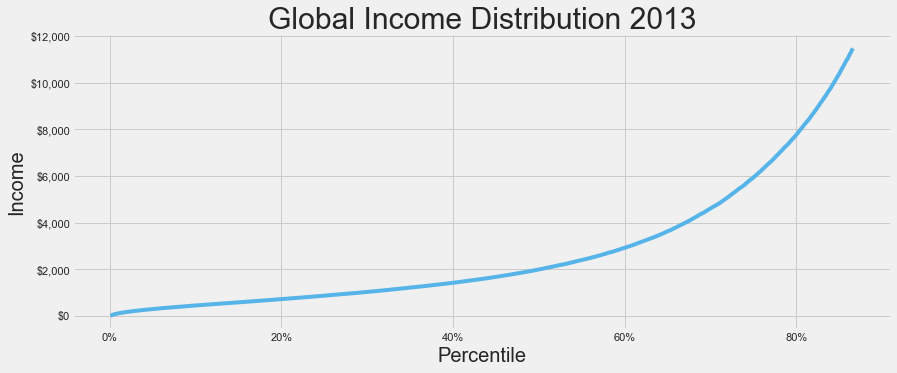

In [107]:
chart = sns.relplot(
  y="midpoint", 
  x="c2013", 
  kind="line",
  color=my_line_color,
  data=subset, 
  height=5,
  aspect=10/4
)

plt.title("Global Income Distribution 2013", fontsize=30)
plt.xlabel("Percentile",fontsize=20)
plt.ylabel("Income",fontsize=20)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

## All 100 percentiles

### WARNING !!!

Apparently if you don't restrict this, seaborn invents and plots values up to 1,000,000 - and it seems to divide all other y values by 10 in the process. No idea why.

### BELOW GRAPH IS WRONG !!!

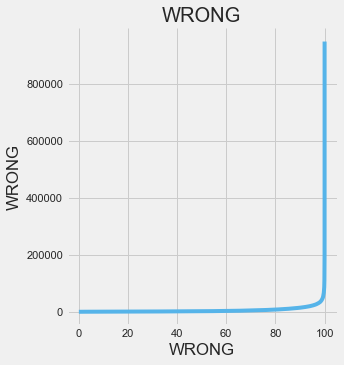

In [108]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  color=my_line_color,
  data=df,          # <----- NOTE THIS RESULTS IN AN INCORRECT GRAPH!!!
  height=5,
  aspect=1
)
chart.set(
  xlabel='WRONG', 
  ylabel='WRONG',
  title='WRONG',
)


### SO WE NEED TO MANUALLY DO THIS:

In [40]:
all_data = df.loc[df['midpoint'] < 100000]

Now we are ready to graph everything!

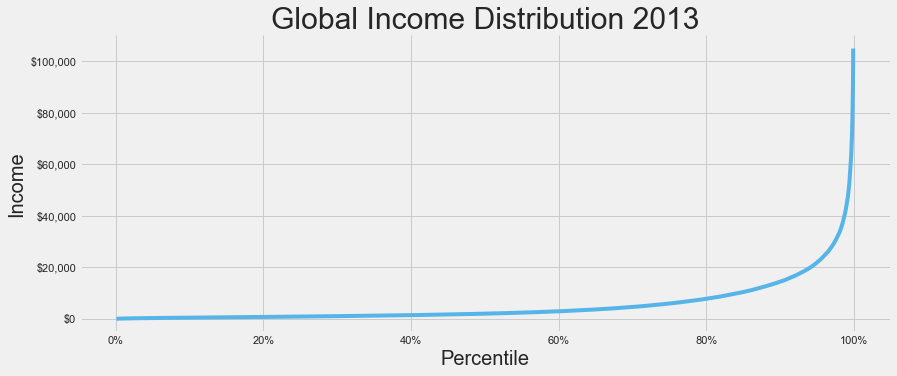

In [109]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  color=my_line_color,
  data=all_data, 
  height=5,
  aspect=10/4
)

plt.title("Global Income Distribution 2013", fontsize=30)
plt.xlabel("Percentile",fontsize=20)
plt.ylabel("Income",fontsize=20)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

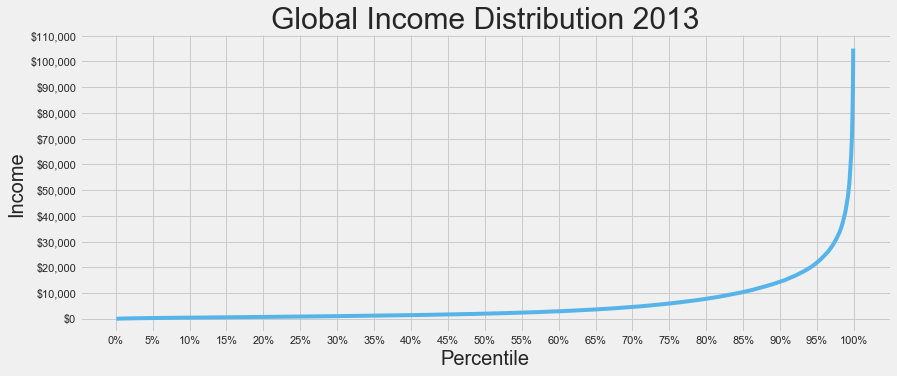

In [110]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  color=my_line_color,
  data=all_data, 
  height=5,
  aspect=10/4
)

chart.axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(10000))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.title("Global Income Distribution 2013", fontsize=30)
plt.xlabel("Percentile",fontsize=20)
plt.ylabel("Income",fontsize=20)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

## Get percentile based on income

In [43]:
def get_percentile(income):
  for j in range(len(df)):
    if df['midpoint'].iloc[j] > income:
      return(df.iloc[j]['c2013'])

In [44]:
get_percentile(14350)

90.0793196448814

In [45]:
get_percentile(44000)

99.0006098631651

Find the location to confirm correct output

In [46]:
df[700:710]

,midpoint,gdpc,a2003,a2013,c2003,c2013
700,14050.0,14100,0.074961,0.110552,94.112095,89.650085
701,14150.0,14200,0.070657,0.099715,94.182753,89.749800
702,14250.0,14300,0.068242,0.100089,94.250995,89.849889
703,14350.0,14400,0.066581,0.103577,94.317575,89.953466
704,14450.0,14500,0.066530,0.125854,94.384106,90.079320
705,14550.0,14600,0.070123,0.085146,94.454229,90.164465
706,14650.0,14700,0.062350,0.099690,94.516579,90.264155
707,14750.0,14800,0.062717,0.099587,94.579296,90.363742
708,14850.0,14900,0.059377,0.085395,94.638673,90.449137
709,14950.0,15000,0.062302,0.100137,94.700975,90.549274


Add extra number at the end for the top-right of the graph to extend higher

In [47]:
all_data.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1287,97500.0,98000,0.001069,0.002731,99.965336,99.890181
1288,98500.0,99000,0.000987,0.002654,99.966322,99.892834
1289,99500.0,100000,0.001121,0.003759,99.967444,99.896593


In [48]:
last_row = {"midpoint": 105000, "c2013": 99.9}

all_data = all_data.append(last_row, ignore_index=True)

In [49]:
all_data.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1288,98500.0,99000,0.000987,0.002654,99.966322,99.892834
1289,99500.0,100000,0.001121,0.003759,99.967444,99.896593
1290,105000.0,NaN,NaN,NaN,NaN,99.900000


Get world percentile for poverty threshold in the US: 

2013 individual income poverty threshold: `$11,490`

In [50]:
get_percentile(11490)

86.64021063473221

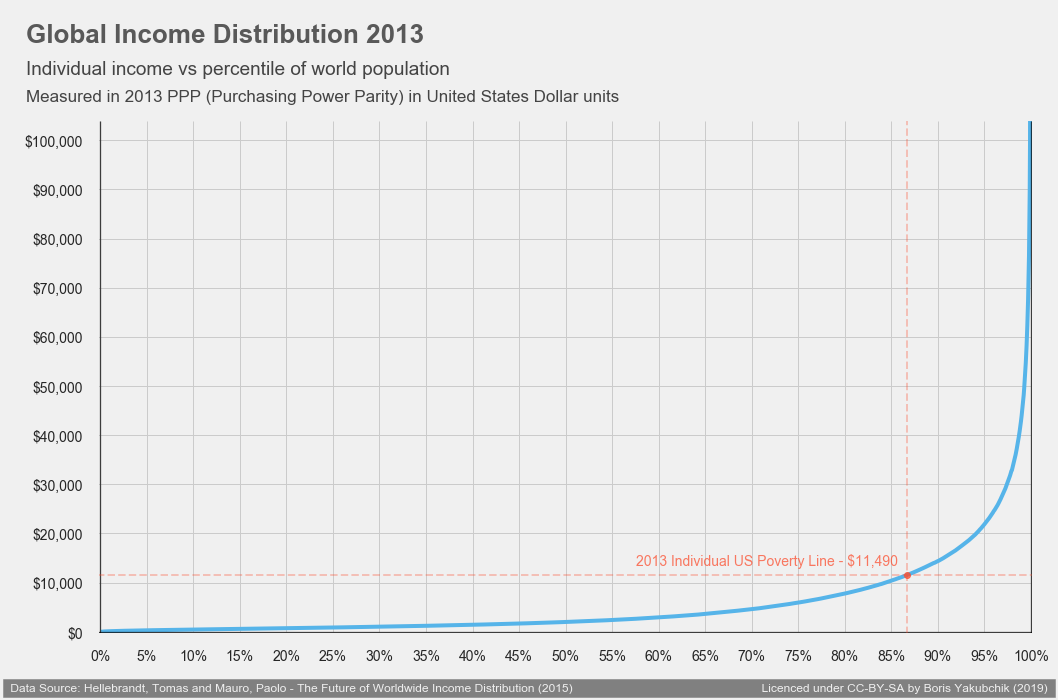

In [111]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  data=all_data, 
  color=my_line_color,
  height=8,
  aspect=16/9
)

chart.axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(10000))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = -8, 
  y = 125000, 
  s = " ")

chart.axes[0][0].text(
  x = -8, 
  y = 120000, 
  s = "Global Income Distribution 2013",
     fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -8, 
  y = 113500,
  s = 'Individual income vs percentile of world population',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -8, 
  y = 108000,
  s = 'Measured in 2013 PPP (Purchasing Power Parity) in United States Dollar units',
  fontsize = 17, alpha = .85)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# poverty threshold 2013 - horizontal
chart.axes[0][0].axhline(y = 11490, linestyle='dashed', color='#fc4f30', linewidth = 2, alpha = .3) 
# poverty threshold 2013 - vertical
chart.axes[0][0].axvline(x = 86.64, linestyle='dashed', color='#fc4f30', linewidth = 2, alpha = .3) 

chart.axes[0][0].text(
  x = 57.6, 
  y = 13600, 
  s = "2013 Individual US Poverty Line - $11,490",
  color = '#fc4f30',
  fontsize = 14, 
#   weight = 'bold', 
  alpha = .75)


chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-400,104000)
chart.axes[0][0].set_xlim(-0.3, 100.1)

# SIGNATURE BAR
chart.axes[0][0].text(
    x = -10, 
    y = -12000,
    s = ' Data Source: Hellebrandt, Tomas and Mauro, Paolo - The Future of Worldwide Income Distribution (2015)                                                        Licenced under CC-BY-SA by Boris Yakubchik (2019) ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

chart.axes[0][0].plot(86.64, 11490, 'o', color='#fc4f30', alpha=0.75) 

## Below US Poverty

Let us examine what happens below the 2013 Indivisual US poverty line

In [52]:
df.loc[df['midpoint'] == 11490]

,midpoint,gdpc,a2003,a2013,c2003,c2013
574,11490.0,11500,0.023025,0.032066,91.932,86.608092


In [53]:
get_percentile(11490)

86.64021063473221

In [54]:
below_us_poverty = df.loc[df['midpoint'] <= 11490]

In [55]:
below_us_poverty.tail(5)

,midpoint,gdpc,a2003,a2013,c2003,c2013
570,11410.0,11420,0.020634,0.027809,91.847731,86.490842
571,11430.0,11440,0.021899,0.034287,91.869629,86.525128
572,11450.0,11460,0.017632,0.025032,91.887261,86.550161
573,11470.0,11480,0.021714,0.025866,91.908975,86.576026
574,11490.0,11500,0.023025,0.032066,91.932000,86.608092


In [56]:
get_percentile(1000)

29.1832129048416

Text(29, 1200, '29% have income below $1000')

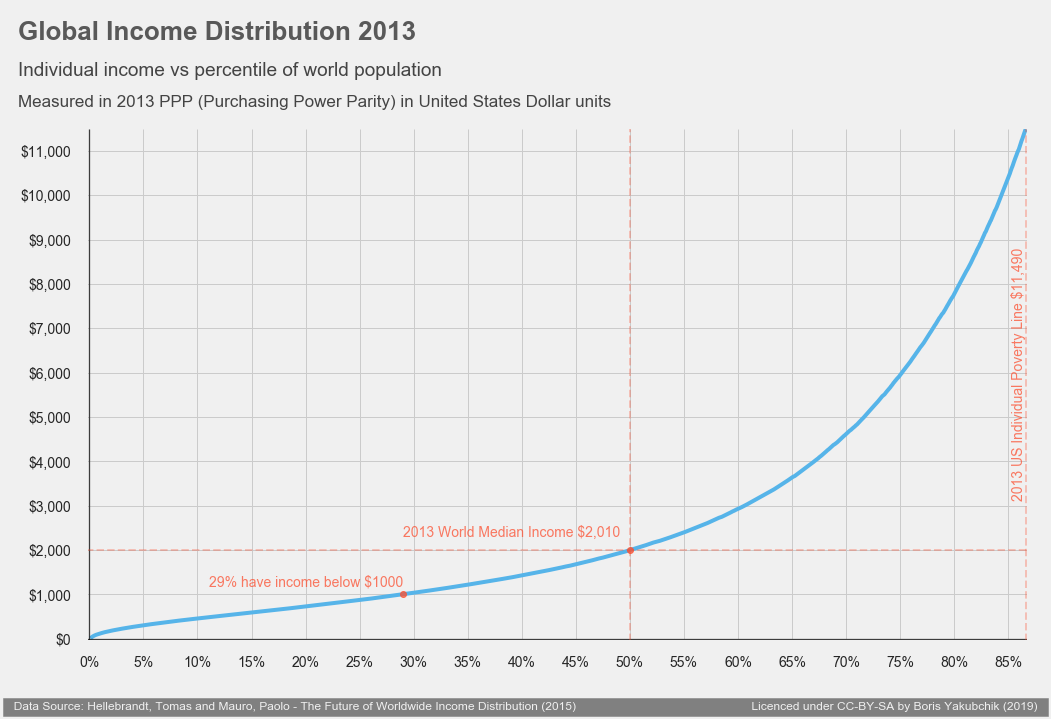

In [112]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  data=below_us_poverty, 
  color=my_line_color,
  height=8,
  aspect=16/9
)

chart.axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(1000))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = -1, 
  y = 14000, 
  s = " ")

chart.axes[0][0].text(
  x = -6.6, 
  y = 13500, 
  s = "Global Income Distribution 2013",
     fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -6.6, 
  y = 12700,
  s = 'Individual income vs percentile of world population',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -6.6, 
  y = 12000,
  s = 'Measured in 2013 PPP (Purchasing Power Parity) in United States Dollar units',
  fontsize = 17, alpha = .85)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 86.64, linestyle='dashed', color='#fc4f30', linewidth = 2, alpha = .3)   # vertical line on right

# poverty threshold MEDIAN - horizontal
chart.axes[0][0].axhline(y = 2010, linestyle='dashed', color='#fc4f30', linewidth = 2, alpha = .3) 
# poverty threshold MEDIAN - vertical
chart.axes[0][0].axvline(x = 50, linestyle='dashed', color='#fc4f30', linewidth = 2, alpha = .3) 

chart.axes[0][0].text(
  x = 49.1, 
  y = 2300, 
  s = "2013 World Median Income $2,010",
  color = '#fc4f30',
  horizontalalignment = 'right',
  fontsize = 14, 
  alpha = .75)

chart.axes[0][0].text(
  x = 85.25, 
  y = 8550, 
  s = "2013 US Individual Poverty Line $11,490",
  rotation = 90,
  color = '#fc4f30',
  fontsize = 14, 
  alpha = .75)

chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-50, 11490)
chart.axes[0][0].set_xlim(-0.3, 86.7)

# SIGNATURE BAR
chart.axes[0][0].text(
    x = -7.6, 
    y = -1600,
    s = '  Data Source: Hellebrandt, Tomas and Mauro, Paolo - The Future of Worldwide Income Distribution (2015)                                                    Licenced under CC-BY-SA by Boris Yakubchik (2019)  ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

chart.axes[0][0].plot(50,2010, 'o', color='#fc4f30', alpha=0.75) 

chart.axes[0][0].plot(29,1000, 'o', color='#fc4f30', alpha=0.75) 
chart.axes[0][0].annotate(
  '29% have income below $1000', (29, 1200), 
  fontsize=14, color='#fc4f30', alpha=0.75, horizontalalignment = 'right')

In [58]:
all_data['c2013'].head(3)

0    0.092346
1    0.184616
2    0.291334
Name: c2013, dtype: float64

In [59]:
def get_ppp_from_percentile(percentile):
  return all_data[all_data['c2013'] > percentile]['midpoint'].iloc[0]

In [60]:
get_ppp_from_percentile(50)

2010.0

In [61]:
custom_ticks = [n * 5 for n in range(1, 20)]

In [62]:
final_values = []
for p in custom_ticks:
  final_values.append(get_ppp_from_percentile(p))

print(final_values)

[310.0, 470.0, 610.0, 730.0, 890.0, 1050.0, 1230.0, 1430.0, 1690.0, 2010.0, 2410.0, 2950.0, 3650.0, 4630.0, 5950.0, 7790.0, 10410.0, 14450.0, 21950.0]


In [63]:
custom_ticks

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [64]:
final_values

[310.0,
 470.0,
 610.0,
 730.0,
 890.0,
 1050.0,
 1230.0,
 1430.0,
 1690.0,
 2010.0,
 2410.0,
 2950.0,
 3650.0,
 4630.0,
 5950.0,
 7790.0,
 10410.0,
 14450.0,
 21950.0]

### Archive

In [65]:
# move the chart around if you'd like
# x1,x2,y1,y2 = chart.axes[0][0].axis()
# chart.axes[0][0].axis((x1,x2,y1 + 10000 ,y2 + 10000))